In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
for decade in ['60', '70', '80', '90', '00', '10']:
    url = f'https://raw.githubusercontent.com/fortyTwo102/The-Spotify-Hit-Predictor-Dataset/master/dataset-of-{decade}s.csv'
    new_data = pd.read_csv(url)
    new_data['decade'] = int(decade)
    new_data['is_hit'] = new_data['target']
    new_data = new_data.drop(columns=['target'])
    df = df.append(new_data)

df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,is_hit
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,60,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,60,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,60,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,60,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,60,0


# Data Analysis 
Data is already clean ans has no missing values

In [3]:
df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade', 'is_hit'],
      dtype='object')

In [4]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,is_hit
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,52.925607,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,32.562672,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599793,8.000000,10.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,60.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,80.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,90.000000,1.000000


In [5]:
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
decade              0
is_hit              0
dtype: int64

In [6]:
df.groupby('is_hit').mean()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
is_hit,,,,,,,,,,,,,,,,
0,0.478153,0.534794,5.178660,-11.740813,0.656644,0.076477,0.447581,0.278145,0.210432,0.475302,118.388219,243659.56094,3.849316,40.988048,10.767966,52.925607
1,0.601237,0.624296,5.248528,-8.702237,0.730064,0.069444,0.280814,0.030687,0.192637,0.609578,120.288280,226095.53997,3.938063,39.224034,10.183380,52.925607


Most means are pretty close to eachother. Seems hit songs tend to be more danceable, have more energy, less acoustic and instrumental sounds and a higer valence - as such these features may be our stronger predictors

<AxesSubplot:>

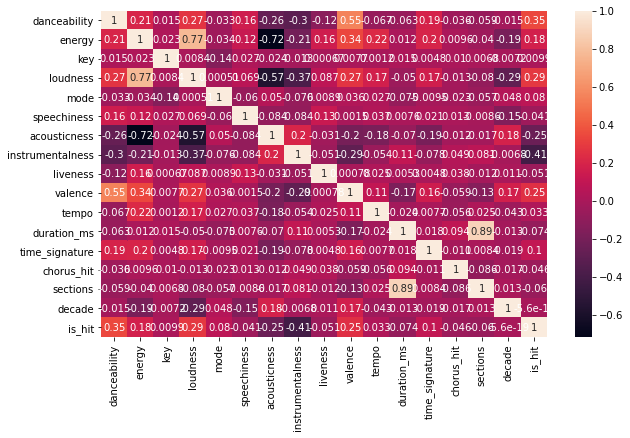

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df.corr(), ax=ax, annot=True)

Some stronger correlation between duration and sections (which makes sense - the longer the song the more sections it may have )
Loudness and energy also have a higer correlation since they are similar features 
May need to consider removing some features as to not have higly correlated features 

<AxesSubplot:>

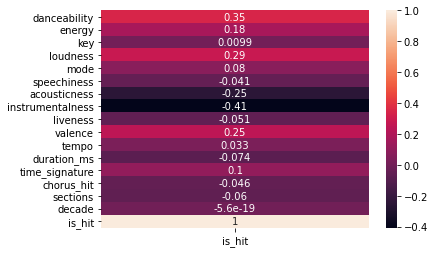

In [8]:
corr = df.corr()[['is_hit']]
sns.heatmap(corr, annot=True)

Not really any features that are highly correlated with the target. Maybe the interaction of some of these features helps in predicting if a song is a hit 

<AxesSubplot:>

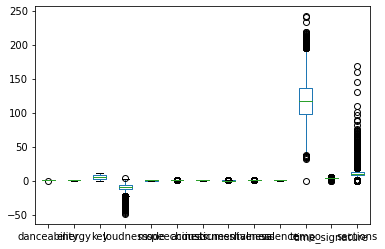

In [9]:
df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'sections']].plot(kind='box')

In [18]:
df.groupby(['is_hit']).is_hit.count()

is_hit
0    20553
1    20553
Name: is_hit, dtype: int64

<AxesSubplot:>

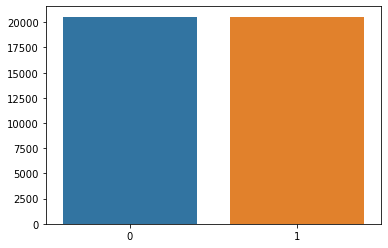

In [22]:
sns.barplot(x=[0, 1], y=[len(df[df['is_hit'] == 1]), len(df[df['is_hit'] == 0])])

Thanks to Kaggle, we have a perfectly balanced dataset so we dont need to address any class imbalance 

# Baseline 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [28]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df)

# Extract the features and target variable
# Train on all features 
features = ['danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
            'sections', 'decade']
target = 'is_hit'

# Split the features and target variable for both training and testing sets
train_X = train_df[features]
train_y = train_df[target]
test_X = test_df[features]
test_y = test_df[target]

In [29]:
# Train a Random Forest Classifier on the training data
clf = RandomForestClassifier()
clf.fit(train_X, train_y)

# Make predictions on the test data
preds = clf.predict(test_X)

# Evaluate the model's performance
acc = accuracy_score(test_y, preds)
print("Accuracy: ", acc)

Accuracy:  0.8041257176218741
